In [5]:
!pip install numpy
!pip install pandas

import numpy as np
import pandas as pd


In [10]:
np.random.seed(42)

In [11]:
# user id | age | gender | occupation | zip code
user_data = pd.read_csv("u.user", sep='|',
                        names=["user_id", "age","gender", "occupation", "zip_code"])
user_data

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [12]:
# user id | item id | rating | timestamp
rating_data = pd.read_csv("u.data",
                          sep='\t',
                          names=["user_id", "item_id", "rating", "timestamp"])
rating_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [13]:
column_names = ['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

movie_data = pd.read_csv("u.item", encoding='iso-8859-1', sep='|',
                         names=column_names
                        )
movie_data

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# What kind of features can we use to predict the rating of a user for a movie?
$$X\theta = y$$
- User:
    - Age
    - Gender
    - Occupation
- Item:
    - Genre

In [14]:
user_data.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [15]:
occupation_dummies = pd.get_dummies(user_data[["user_id", "occupation"]])
occupation_dummies

,user_id,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# let's build user features
user_data = user_data.assign(is_male=user_data.gender == "M")
user_X = user_data[["user_id","is_male"]].merge(occupation_dummies, on=["user_id"])
user_X

,user_id,is_male,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,False,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,False,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,True,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# let's build the movie features
movie_data = movie_data.drop(["release date", "video release date", "IMDb URL"], axis="columns")
movie_data

,movie id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
movie_X = movie_data.drop(["movie title"], axis="columns")
movie_X

,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Let's combine our features

In [19]:
Xy = rating_data.merge(user_X, on="user_id")
Xy = Xy.merge(movie_X, right_on="movie id", left_on="item_id")
Xy = Xy.drop(["user_id", "item_id", "movie id", "timestamp"], axis="columns")
Xy

,rating,is_male,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,True,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,1,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,2,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X = Xy.drop(["rating"], axis="columns")
y = Xy.rating

In [45]:
Xy

,rating,is_male,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,True,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,1,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,2,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,3,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# we have 85 features
X.shape
y.shape

(100000,)

# Let's build our regression model

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test, predictions))

1.1037894649706244

In [26]:
age = int(input("Age: "))
gender = int(input("Male (1), Female(0): "))
occupation = input("Occupation: ")
genres = input("Genres (separated by a ,): ")

Age: -1
Male (1), Female(0): 0
Occupation: teacher
Genres (separated by a ,): romance, documentary


In [27]:
chosen_genres = genres.split(',')
chosen_genres

genres_vector = []
for g in movie_X.columns[1:]:
    genres_vector.append(g.lower() in chosen_genres)
genres_vector

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False]

In [28]:
occupations = user_X.columns[2:]
occupations

Index(['occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

In [29]:
occupations_vector = []
for o in user_X.columns[2:]:
    occupations_vector.append(o.lower()==f"occupation_{occupation}")
occupations_vector

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [30]:
X.columns

Index(['is_male', 'occupation_administrator', 'occupation_artist',
       'occupation_doctor', 'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [31]:
test_x = [gender] + occupations_vector + genres_vector
test_x

[0,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False]

In [32]:
reg.predict([test_x])

array([2.53702827e+11])

In [39]:
#Polynomial Regression

In [43]:
transformer = PolynomialFeatures() # initializing the model
transformer.fit(X) # training the model
X_poly = transformer.transform(X)  # using the model to transform the features (apply polynomial transformation)
X_poly

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

ValueError: x and y must be the same size

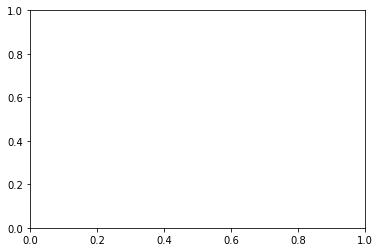

In [46]:
model = LinearRegression() # 2
model.fit(X_poly, y) # 3 training the model
predictions = model.predict(X_poly)# 4 use the model


plt.scatter(X, y, label="data")
plt.scatter(X, y, label="predictions")
plt.xlabel("Perc Population")
plt.ylabel("Spreading Factor")

In [ ]:
def pipeline(degree):
    transformer = PolynomialFeatures(degree=degree)
    transformer.fit(X_train)
    X_train_poly = transformer.transform(X_train)
    X_test_poly = transformer.transform(X_test)
    
    
    model = LinearRegression() # 2
    model.fit(X_train_poly, y_train) # 3 training the model
    predictions = model.predict(X_test_poly)# 4 use the model
    

    # calculating MSE 
    rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train_poly)))
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
    
    plt.scatter(df.Perc_population, df.Spreading_factor, label="data")
    plt.scatter(X_test.Perc_population, predictions, label="predictions")
    plt.xlabel("Perc Population")
    plt.ylabel("Spreading Factor")
    plt.title(str(degree))
    plt.show()
    
    return rmse_train, rmse_test

In [ ]:
degrees = np.arange(1, 21)
train_errors = list()
test_errors = list()
for degree in degrees:
    rmse_train, rmse_test = pipeline(degree)
    train_errors.append(rmse_train)
    test_errors.append(rmse_test)